In [134]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

/kaggle/input/speechdata - Sheet1.csv


In [135]:
#reading the csv first
speechData = pd.read_csv("/kaggle/input/speechdata - Sheet1.csv",encoding='latin-1')
speechData

,COMMENT,LABEL
0,To all these social media activists apprentice...,Highly-Offensive
1,This will be one of the few times I'll give an...,Moderate
2,"Cameroon, February 2008-29, 25, the draft cons...",Highly Offensive
3,Well done my President my beloved national gra...,Neutral
4,Cameroon: The apprentices apprentices ' inform...,Highly -Offensive
...,...,...
126,Another act of gratuitous violence in Anglopho...,Neutral
127,Anglophone Crisis: Population Rise Up Against...,Neutral
128,The Amba Boys won the hearts of the people. Th...,Neutral
129,Extraordinary to watch how within four years A...,Neutral


In [136]:
type(speechData)

pandas.core.frame.DataFrame

In [137]:
#checking the top data first
speechData_head=speechData.head(5)
speechData_head

,COMMENT,LABEL
0,To all these social media activists apprentice...,Highly-Offensive
1,This will be one of the few times I'll give an...,Moderate
2,"Cameroon, February 2008-29, 25, the draft cons...",Highly Offensive
3,Well done my President my beloved national gra...,Neutral
4,Cameroon: The apprentices apprentices ' inform...,Highly -Offensive


In [138]:
#checking the column in the data
for col in speechData.columns: 
    print(col) 

                                                                                                                                                                                      COMMENT
                 LABEL


In [139]:
#appears to be a space in between the two speechData columns
speechData.columns

Index(['                                                                                                                                                                                      COMMENT', '                 LABEL'], dtype='object')

In [140]:
altered_speechData = speechData.rename(columns={'                                                                                                                                                                                      COMMENT':'Text','                 LABEL': 'Label'})

In [141]:
#checking the columns again
altered_speechData.columns

Index(['Text', 'Label'], dtype='object')

In [142]:
#looking at the number of unique labels
altered_speechData['Label'].nunique()

7

In [143]:
#what are those labels
altered_speechData['Label'].unique()

array(['Highly-Offensive', 'Moderate', 'Highly Offensive', 'Neutral',
       'Highly -Offensive', 'Offensive', 'Hihly-Offensive'], dtype=object)

In [144]:
#altering the labels so that there are only 3 unique labels
altered_speechData_dict = {'Highly-Offensive':'Highly-Offensive','Moderate':'Neutral','Highly Offensive':'Highly-Offensive',
                          'Neutral':'Neutral','Highly -Offensive':'Highly-Offensive','Offensive':'Offensive',
                          'Hihly-Offensive':'Highly-Offensive'}
altered_speechData['Label']=altered_speechData['Label'].map(altered_speechData_dict)
altered_speechData.head(5)

,Text,Label
0,To all these social media activists apprentice...,Highly-Offensive
1,This will be one of the few times I'll give an...,Neutral
2,"Cameroon, February 2008-29, 25, the draft cons...",Highly-Offensive
3,Well done my President my beloved national gra...,Neutral
4,Cameroon: The apprentices apprentices ' inform...,Highly-Offensive


In [145]:
#checking whether the number of label values has been reduced to 3
altered_speechData['Label'].nunique()

3

In [146]:
#adding a new column of label_no that represents labels
# import LabelEncoder 
from sklearn.preprocessing import LabelEncoder
# Instatniate LabelEncoder
le = LabelEncoder()
# LabelEncode Class column of df 
altered_speechData["Label_no"] = le.fit_transform(altered_speechData["Label"])
# Inspecting encoded df
altered_speechData.head()

,Text,Label,Label_no
0,To all these social media activists apprentice...,Highly-Offensive,0
1,This will be one of the few times I'll give an...,Neutral,1
2,"Cameroon, February 2008-29, 25, the draft cons...",Highly-Offensive,0
3,Well done my President my beloved national gra...,Neutral,1
4,Cameroon: The apprentices apprentices ' inform...,Highly-Offensive,0


In [147]:
#checking whether the number of label_no values is also 3
altered_speechData['Label_no'].nunique()

3

In [148]:
#checking the unique values in the Label_no
altered_speechData['Label_no'].unique()

array([0, 1, 2])

In [149]:
#checking the tail to see whether their is randomness in the label column
altered_speechData.tail(5)

,Text,Label,Label_no
126,Another act of gratuitous violence in Anglopho...,Neutral,1
127,Anglophone Crisis: Population Rise Up Against...,Neutral,1
128,The Amba Boys won the hearts of the people. Th...,Neutral,1
129,Extraordinary to watch how within four years A...,Neutral,1
130,South West toughens stance on Anglophone crisi...,Neutral,1


In [150]:
#lets shuffle the data
shuffled_altered_speechData = altered_speechData.sample(frac=1).reset_index(drop=True)
shuffled_altered_speechData.tail(5)

,Text,Label,Label_no
126,"If you are from Cameroon, do you feel the dela...",Neutral,1
127,Happy Youth Day Cameroon! \n\nA bit of history...,Neutral,1
128,We are suffering in this country and you want ...,Neutral,1
129,"A man has been found dead in Tatum, in the Bui...",Neutral,1
130,Undoubtedly the #Commonwealth is a corrupt org...,Highly-Offensive,0


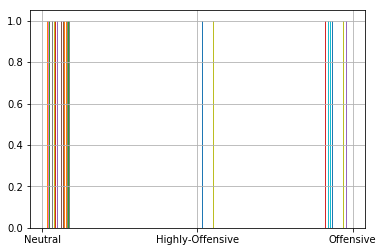

In [151]:
#checking the distribustion of the labels to see the most rampant
shuffled_altered_speechData['Label'].hist()

In [152]:
#looking at the above histogram Neutral is the most prevalent then Highly-Offensive then Offensive
# collecting only the Text from the csv file into a variable name comments_dataset
comments_dataset=shuffled_altered_speechData.Text

In [153]:
#checking out the data that has been picked out
comments_dataset.head()

0    French Camerounese politician and Law Professo...
1    Here is a national of sangmelima who is assign...
2        the apprentice wizards, the case is beyond me
3    This the result of declaring war on the people...
4    Remember there has always existed a Southern C...
Name: Text, dtype: object

In [154]:
#checking the comments_dataset type
type(comments_dataset)

pandas.core.series.Series

In [155]:
#importing some necessary dependencies
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn

## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(comments_dataset):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    comments_dataset_space = comments_dataset.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    comments_dataset_name = comments_dataset_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    comments_dataset = comments_dataset_name.str.replace(giant_url_regex, '')
    # removal of punctuations and numbers
    punc_remove = comments_dataset.str.replace("[^a-zA-Z]", " ")
    # removal of capitalization
    comments_dataset_lower = punc_remove.str.lower()
    
    # tokenizing
    tokenized_comments_dataset = comments_dataset_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_comments_dataset=  tokenized_comments_dataset.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_comments_dataset = tokenized_comments_dataset.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_comments_dataset)):
        tokenized_comments_dataset[i] = ' '.join(tokenized_comments_dataset[i])
        comments_dataset_p= tokenized_comments_dataset
    
    return comments_dataset_p

processed_comments_dataset = preprocess(comments_dataset)   

shuffled_altered_speechData['processed_Text'] = processed_comments_dataset
shuffled_altered_speechData

,Text,Label,Label_no,processed_Text
0,French Camerounese politician and Law Professo...,Neutral,1,french camerounes politician law professor mr ...
1,Here is a national of sangmelima who is assign...,Highly-Offensive,0,nation sangmelima assign sub prefect eastern c...
2,"the apprentice wizards, the case is beyond me",Offensive,2,apprentic wizard case beyond
3,This the result of declaring war on the people...,Offensive,2,result declar war peopl former british souther...
4,Remember there has always existed a Southern C...,Neutral,1,rememb alway exist southern cameroon alway two...
...,...,...,...,...
126,"If you are from Cameroon, do you feel the dela...",Neutral,1,cameroon feel delay parliamentari municip elec...
127,Happy Youth Day Cameroon! \n\nA bit of history...,Neutral,1,happi youth day cameroon bit histori feb th ce...
128,We are suffering in this country and you want ...,Neutral,1,suffer countri want enjoy chicken eat dark lik...
129,"A man has been found dead in Tatum, in the Bui...",Neutral,1,man found dead tatum bui divis north west regi...


In [156]:
#checking the type after the addition of the processed text data type
type(shuffled_altered_speechData)

pandas.core.frame.DataFrame

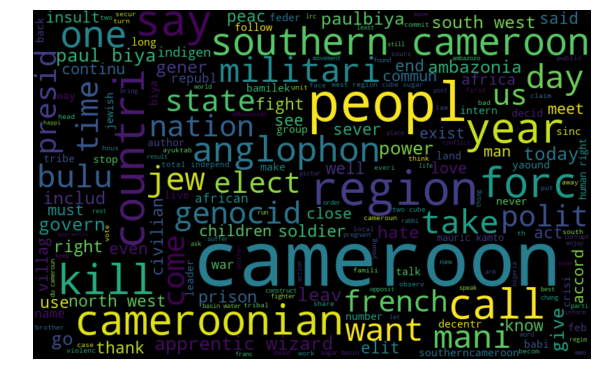

In [157]:
#importing necessary dependencies for visualization
#from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# visualizing which of the word is most commonly used in the processed_Text

import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join([text for text in shuffled_altered_speechData['processed_Text'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [162]:
#Feauture Generation
# Bigram Features

bigram_vectorizer = CountVectorizer(ngram_range=(1,2),max_df=0.75, min_df=1, max_features=10000)
# bigram feature matrix
bigram = bigram_vectorizer.fit_transform(processed_comments_dataset).toarray()
bigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [163]:
#TF-IDF Features

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(shuffled_altered_speechData['processed_Text'] )
tfidf

<131x159 sparse matrix of type '<class 'numpy.float64'>'
	with 1296 stored elements in Compressed Sparse Row format>

In [168]:
#Building a model using Logistic Regression
# Using Bigram Features
X = pd.DataFrame(bigram)
y = shuffled_altered_speechData['Label_no'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


model = LogisticRegression(class_weight='balanced',penalty="l2", C=0.01).fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)

print("Accuracy Score:" , accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.64      0.88      0.74         8
           2       0.00      0.00      0.00         3

    accuracy                           0.50        14
   macro avg       0.21      0.29      0.25        14
weighted avg       0.36      0.50      0.42        14

Accuracy Score: 0.5


In [ ]:
# Running the model Using TFIDF without additional features

X = tfidf
y = shuffled_altered_speechData['Label_no'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)

print("Accuracy Score:" , accuracy_score(y_test,y_preds))